# Taller 1 Juan Pablo Leal Jaramillo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from scipy.stats import t
import statsmodels.api as sm

# Punto 1

### 1.A

In [ ]:
x = [-2, -1, 0, 1, 2]
y = [0, 0, 1, 1, 3]

In [ ]:
df_p1 = pd.DataFrame({'x': x, 'y': y})

In [ ]:
regression_model = smf.ols('y~x' , df_p1)
results = regression_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     13.36
Date:                Sat, 07 May 2022   Prob (F-statistic):             0.0354
Time:                        16:22:19   Log-Likelihood:                -3.3094
No. Observations:                   5   AIC:                             10.62
Df Residuals:                       3   BIC:                             9.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000      0.271      3.693      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


El modelo resultante fue este:
$y = 1 + 0.7x$

Segun los resultados del modelo seria:
$y = 1 + 0.7(1)$

$y = 1 + 0.7$

El valor esperado de y cuando x=1 sería:

$y = 1.7$

### 1.B

In [ ]:
df_p1['Ones'] = 1
y_1 = df_p1['y']
x_1 = np.array(df_p1[['Ones','x']])

In [ ]:
bethas = inv(x_1.T @ x_1) @ (x_1.T @ y_1)
bethas

array([1. , 0.7])

In [ ]:
SSE = y_1.T @ y_1 - bethas.T @ x_1.T @ y_1

In [ ]:
n = len(y_1)
S2 = SSE/(n-2)

In [ ]:
w = np.array([1, 2])
y_pred_min = w @ bethas - t.ppf(0.975 , df = 25) * np.sqrt(S2) * np.sqrt(1 + w.T @ inv(x_1.T @ x_1) @ w)
y_pred_max = w @ bethas + t.ppf(0.975 , df = 25) * np.sqrt(S2) * np.sqrt(1 + w.T @ inv(x_1.T @ x_1) @ w)

In [ ]:
y_pred_min.round(2)

0.82

In [ ]:
y_pred_max.round(2)

3.98

El intervalo sería entre: 

$[0.82;3.98]$

### 1.C

In [ ]:
t.ppf(0.975 , df=25)

2.059538552753294

In [ ]:
t.ppf(0.025 , df=25)

-2.0595385527532946

Los datos no presentarían evidencia suficiente para realizar el modelo ya que dan valores muy malos por fuera del intervalo de confianza

# Punto 2

In [ ]:
df_p2 = pd.read_csv('paises.csv')
df_p2.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
count,96.000000,96.000000,96.000000,9.600000e+01,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1.870833,39.062500,37.281250,1.165874e+05,69261.322917,165.125000,509.843750,27.333333,0.553125,1854.427083,4.554167
std,1.240282,32.138127,8.774008,2.236020e+05,134978.103153,195.990991,574.628637,20.025072,1.348055,2239.284513,5.221936
min,-0.600000,4.000000,13.000000,1.353000e+03,6.000000,2.000000,7.000000,0.000000,-4.300000,20.000000,0.100000
25%,0.875000,11.000000,31.000000,8.014250e+03,4675.750000,15.500000,178.500000,10.000000,-0.025000,287.750000,0.700000
50%,2.000000,32.500000,39.000000,2.924300e+04,21422.000000,74.000000,381.500000,25.500000,0.150000,914.500000,2.600000
75%,2.725000,56.500000,44.000000,1.092218e+05,65783.500000,231.500000,662.000000,42.250000,1.200000,2553.500000,7.050000
max,5.800000,124.000000,51.000000,1.451051e+06,928083.000000,681.000000,4575.000000,77.000000,5.100000,10531.000000,33.900000


### 2.A

In [ ]:
S = df_p2.cov().round(2)
S_inv = inv(S)

In [ ]:
R2 = 1 - 1/(np.diag(S) * np.diag(S_inv))
R2

array([0.68319185, 0.67900184, 0.6404013 , 0.66576898, 0.63058522,
       0.81739869, 0.29816882, 0.18727591, 0.21643866, 0.87287136,
       0.80968246])

La variable que mejor se explica mediante las demás es la penúltima de ese arreglo de R2 que corresponde a X10

In [ ]:
X = df_p2.iloc[:,1:].values

In [ ]:
X.mean(axis=0)

array([3.90625000e+01, 3.72812500e+01, 1.16587417e+05, 6.92613229e+04,
       1.65125000e+02, 5.09843750e+02, 2.73333333e+01, 5.53125000e-01,
       1.85442708e+03, 4.55416667e+00])

In [ ]:
X.std(axis=0)

array([3.19703028e+01, 8.72819083e+00, 2.22434375e+05, 1.34273252e+05,
       1.94967532e+02, 5.71627944e+02, 1.99205017e+01, 1.34101587e+00,
       2.22759104e+03, 5.19466707e+00])

In [ ]:
X_standarized = StandardScaler().fit_transform(X)

In [ ]:
s_cov = np.cov(X_standarized.T)

In [ ]:
vals, vectors = eig(s_cov)

In [ ]:
Z1 = vectors[:,0]
Z2 = vectors[:,1]
Z2

array([ 0.01507277,  0.58711939,  0.30952442,  0.29505797,  0.09273751,
       -0.35500087,  0.50499199,  0.11578101, -0.15734884, -0.21069501])

In [ ]:
proy_Z1 = X_standarized @ Z1
proy_Z2 = X_standarized @ Z2

### 2.B

In [ ]:
proy_Z1[12].round(2)

0.12

In [ ]:
proy_Z2[12].round(2)

2.23

Las coordenadas de $x^{(13)}$ en el plano $Z_{1}$ y $Z_{2}$ son: 

$(0.12,2.23)$

### 2.C

In [ ]:
Z2

array([ 0.01507277,  0.58711939,  0.30952442,  0.29505797,  0.09273751,
       -0.35500087,  0.50499199,  0.11578101, -0.15734884, -0.21069501])

R/ La variable que esta en la posicion 1, es decir X2, es la que más aporta en la componente principal de $Z_{2}$

### 2.D

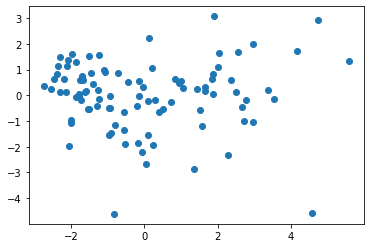

In [ ]:
plt.plot(proy_Z1, proy_Z2, 'o')

Se logra identificar la presencia de los outliers en la grafica

# Punto 3

### 3.B

In [ ]:
X1_3 = [-2, -1, 0, 1, 2]
X2_3 = [0, 0, 1, 1, 3]
Y_3 = [0, 1, 1, 0, 1]

In [ ]:
df_p3 = pd.DataFrame({'x1': X1_3, 'x2': X2_3, 'y': Y_3})
df_p3

,x1,x2,y
0,-2,0,0
1,-1,0,1
2,0,1,1
3,1,1,0
4,2,3,1


In [ ]:
X_reg = df_p3[['x1','x2']]
Y_reg = df_p3['y']

In [ ]:
Reg_log = sm.Logit(Y_reg, X_reg)

In [ ]:
logistic_regression = Reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.601406
         Iterations 6


In [ ]:
print(logistic_regression.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                    5
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 May 2022   Pseudo R-squ.:                  0.1064
Time:                        17:02:05   Log-Likelihood:                -3.0070
converged:                       True   LL-Null:                       -3.3651
Covariance Type:            nonrobust   LLR p-value:                    0.3974
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0406      0.855      0.047      0.962      -1.635       1.716
x2             0.6684      1.012      0.660      0.509      -1.315       2.652


In [ ]:
logistic_regression.predict([0,2])

array([0.79195516])

La prediccion para el punto $(0,2)$ seria de $0.79$